In [1]:
import matplotlib.pyplot as plt
import numpy as np

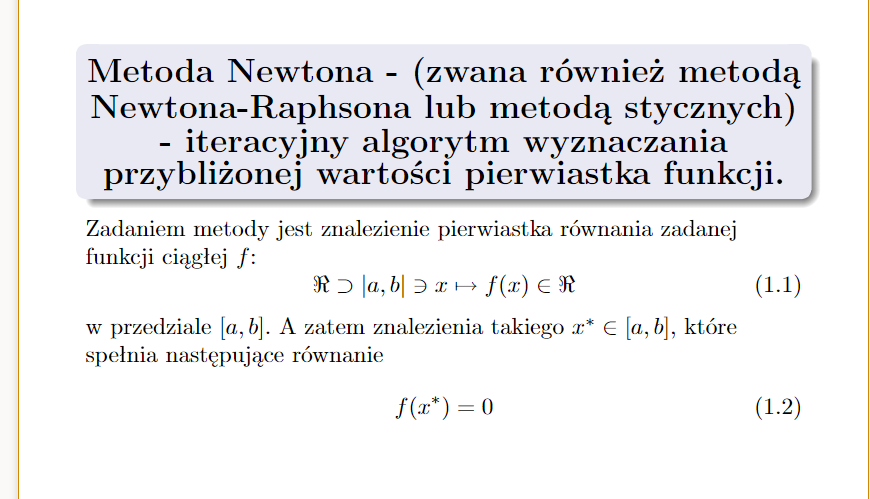

In [2]:
a, b = 2.2, 5

In [3]:
def func(x):
    return np.arctan(np.log(x**3 + 1) - 3)


def dfunc(x):
    return (3*x**2)/((x**3+1)*((3-np.log(x**3+1))**2+1))


def ddfunc(x):
    return 3*x*(8*x**3-(x**3-2)*np.log(x**3+1)**2-12*np.log(x**3+1)+20)/(
    (x**3+1)**2*(np.log(x**3+1)**2-6*np.log(x**3+1)+10)**2
    )

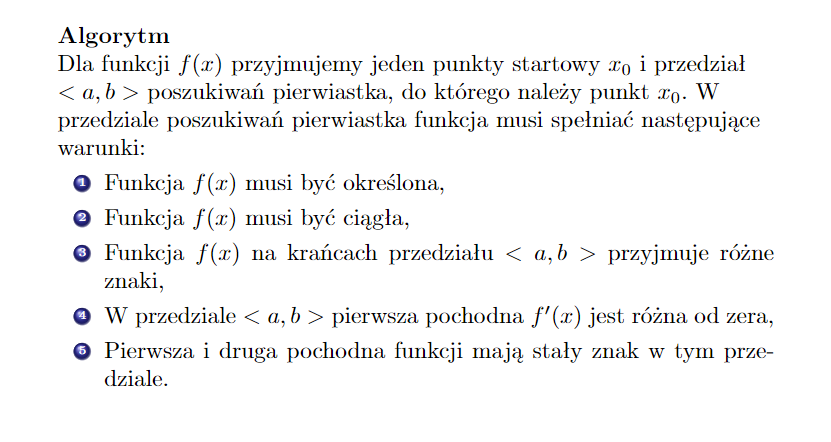

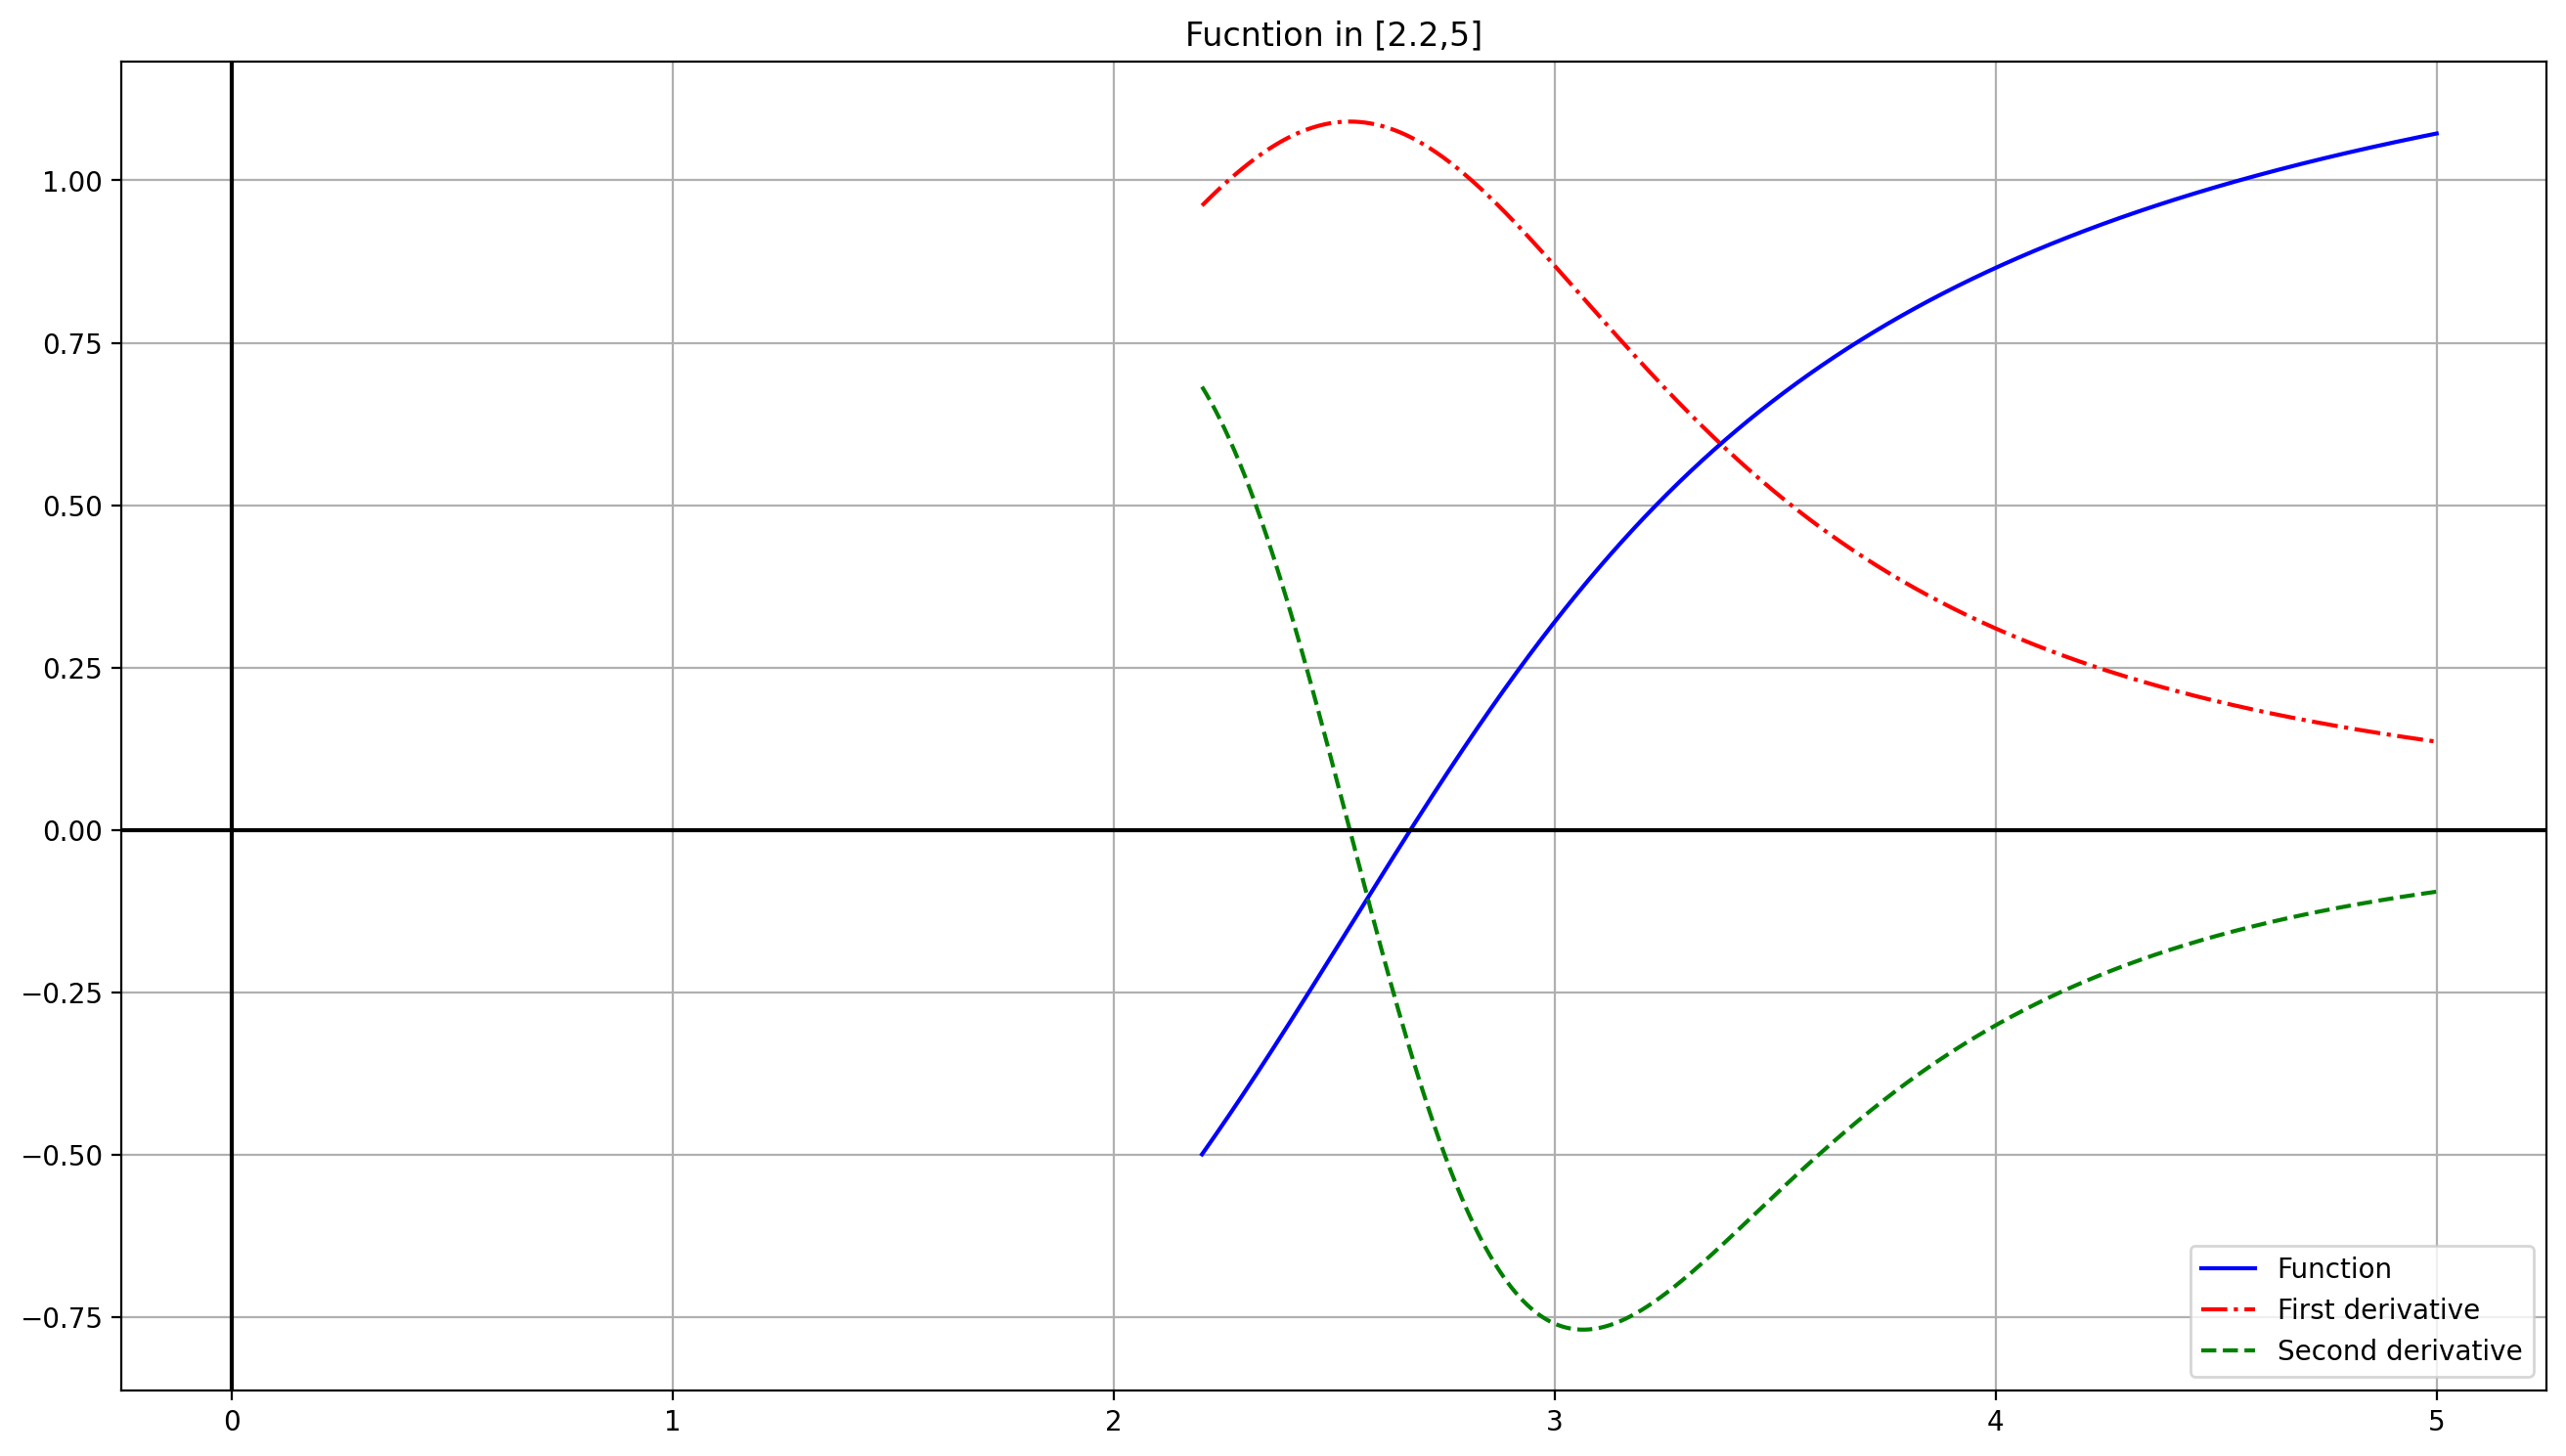

In [4]:
x = np.linspace(a, b, 10 ** 4)
y = func(x)
dy = dfunc(x)
ddy = ddfunc(x)

fig, ax = plt.subplots()
ax.plot(x, y, label="Function", color="blue")
ax.plot(x, dy, label="First derivative", color="red", linestyle="-.")
ax.plot(x, ddy, label="Second derivative", color="green", linestyle="--")

# ax.set_aspect('equal')
ax.grid(True, which='both')
fig.set_size_inches(16, 9)
fig.set_dpi(200)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title(f"Fucntion in [{a},{b}]")
# labelLines(ax.get_lines(), xvals=(0.1, 1), zorder=2.5)
ax.legend()

## Funckja na krańcach <a,b> ma różne znaki


In [5]:
assert np.sign(func(a)) != np.sign(func(b))

## W przedziale <a,b> pierwsza pochodna f'(x) jest różna od zera

In [6]:
truth_array = dfunc(x) != 0  # to trochę słabo działa bo sampujemy punkty które mogę nie być równo na 0
assert truth_array.all()

### Algorytm
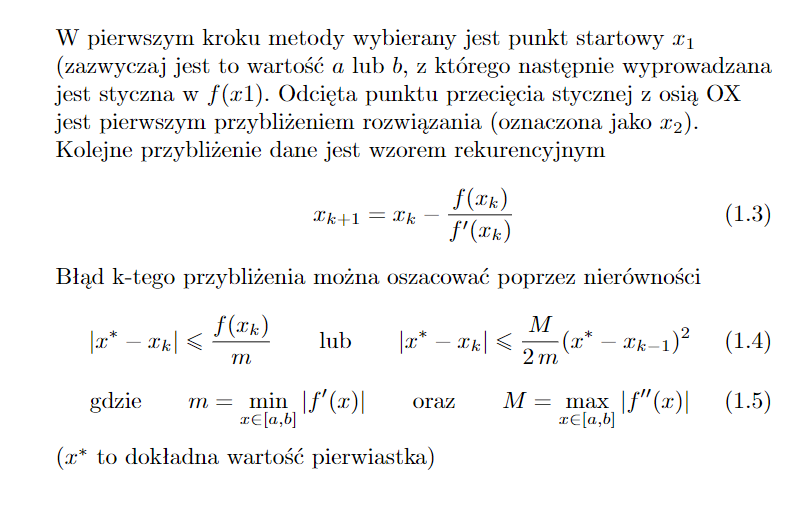

In [7]:
x = a
max_iter = 1000
epsilon = 10 ** (-710)

for i in range(max_iter):
    if np.abs(func(x)) <= epsilon:
        print("np.abs(func(x)) <= epsilon")
        break
    new_x = x - func(x) / dfunc(x)

    if np.abs(x - new_x) <= epsilon:
        print("np.abs(x - new_x) <= epsilon")
        break
    x = new_x
    print(f"Iteration {i:<4} | x={x:<20} | f(x)={func(x)} ")

Iteration 0    | x=2.719028380153164    | f(x)=0.049332048940445086 
Iteration 1    | x=2.6719779880284964   | f(x)=-0.0004501734063324539 
Iteration 2    | x=2.672399957327933    | f(x)=-3.017194671883771e-08 
Iteration 3    | x=2.6723999856133505   | f(x)=-4.440892098500626e-16 
Iteration 4    | x=2.672399985613351    | f(x)=0.0 
np.abs(func(x)) <= epsilon
